In [5]:
!pip install pingouin

     |████████████████████████████████| 183 kB 22.4 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 9.8 MB 34.6 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.1-py3-none-any.whl size=194002 sha256=3524298a8a2c022fec37a3dfe4e439b5cdc1969b75d49faa072550fab29a3713
  Stored in directory: /root/.cache/pip/wheels/74/a7/b6/5b5f03b0395fdada1f45d3aed76e7da48873a02805545ef652
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=6b45290c8e5563c311e5ff5f40ef87bbb795f103f19d3a0867182fd6a2dd4f99
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling stats

# ***Hypothesizing about the mean***

$$H_0: \text{Average compensation} = \$110,000$$
$$H_1: \text{Average compensation} \neq \$110,000$$

In [ ]:
import pandas as pd

stack_overflow = pd.read_feather('stack_overflow.feather')
mean_comp_samp = stack_overflow['converted_comp'].mean()

# Point Estimate

print(f'mean compensation is ${mean_comp_samp:,.2f}.')

mean compensation is $119,574.72.


## ***Does this mean differ by random chance or actually differ***

# ***Generating a bootstrap distribution***



In [ ]:
import numpy as np

# Step 3. Repeat steps 1 & 2 many times, appending to a list
so_boot_distn = []

for i in range(5000):
    so_boot_distn.append(np.mean(stack_overflow.sample(frac=1, replace=True)['converted_comp']))

# ***Visualizing the bootstrap distribution***

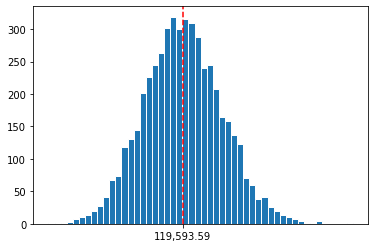

In [ ]:
import matplotlib.pyplot as plt

plt.hist(so_boot_distn, bins=50, edgecolor='white')
plt.axvline(np.mean(so_boot_distn), color='red', linestyle='--')
plt.xticks([np.mean(so_boot_distn)])
plt.gca().set_xticklabels(['{:,.2f}'.format(x) for x in plt.gca().get_xticks()])
plt.show()

# ***Standard error***

In [ ]:
std_error = np.std(so_boot_distn, ddof=1)
print(f'The standard error is {std_error:,.2f}')

The standard error is 5,628.99


# ***Z Standardized***


$$\text{Standardized Value} = \frac{\text{value} - \text{mean}}{\text{standard deviation}}$$

$$\text{Z-Statistic} = \frac{\text{Sample Statistic} - \text{Hypothesis parameter value}}{\text{Standard Error}}$$

* ระวัง (เพราะลืมหมดแล้ว) Standard Error ของ Mean คือ $\dfrac{\sigma}{\sqrt{n}}$ ที่หาจาก `df['data'].std()` มันคือ $\sigma$ ซึ่ง `df_bootstrap['mean_data'].std()` ถึงจะมีค่าใกล้เคียงกับ $\dfrac{\sigma}{\sqrt{n}}$

### ***Calculating the sample mean***

The `late_shipments` dataset contains supply chain data on the delivery of medical supplies. Each row represents one delivery of a part. The late columns denotes whether or not the part was delivered late. A value of `"Yes"` means that the part was delivered late, and a value of `"No"` means the part was delivered on time.

Let's begin our analysis by calculating a point estimate (or sample statistic), namely the proportion of late shipments.

* Calculate the proportion of late shipments in the sample; that is, the mean cases where the late column is `"Yes"`.

In [ ]:
import pandas as pd

late_shipments = pd.read_feather('late_shipments.feather')

# Print the late_shipments dataset
display(late_shipments.head())

# Calculate the proportion of late shipments
late_prop_samp = late_shipments[late_shipments['late']=='Yes']['late'].shape[0] / late_shipments.shape[0]

# Print the results
print(late_prop_samp)

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


0.061


### ***Calculating a z-score***

Since variables have arbitrary ranges and units, we need to standardize them. For example, a hypothesis test that gave different answers if the variables were in Euros instead of US dollars would be of little value. Standardization avoids that.

One standardized value of interest in a hypothesis test is called a z-score. To calculate it, you need three numbers: the sample statistic (point estimate), the hypothesized statistic, and the standard error of the statistic (estimated from the bootstrap distribution).

* `late_shipments_boot_distn` is a bootstrap distribution of the proportion of late shipments, available as a list.


* Hypothesize that the proportion of late shipments is 6%.
* Calculate the standard error from the standard deviation of the bootstrap distribution.
* Calculate the z-score.

In [ ]:
import pandas as pd
import numpy as np

late_shipments = pd.read_feather('late_shipments.feather')
late_prop_samp = late_shipments[late_shipments['late']=='Yes']['late'].shape[0] / late_shipments.shape[0]
late_shipments_boot_distn = []
for i in range(5000):
    late_boot = late_shipments.sample(frac=1, replace=True)
    late_shipments_boot_distn.append(late_boot[late_boot['late']=='Yes']['late'].shape[0] / late_boot.shape[0])

#############################################################################

# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn, ddof=1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Print z_score
print(z_score)

0.1313767753897918


# ***p-values***

* probability of obtaining a result,
assuming the null hypothesis is true

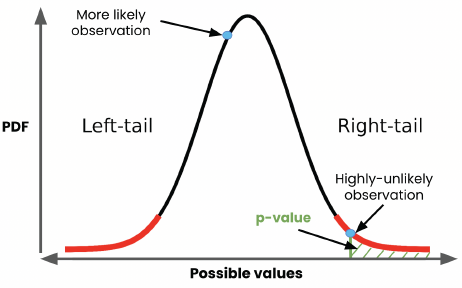

## ***Calculating the p-value***

In [ ]:
from scipy.stats import norm

# Left-tailed test → use 
norm.cdf() 

# Right-tailed test → use 
1 - norm.cdf()

# Two-tailed 

norm.cdf(-z_score) + 1 - norm.cdf(z_score) = 2 * (1 - norm.cdf(z_score)) # by symmetry

### ***Calculating p-values***

In order to determine whether to choose the null hypothesis or the alternative hypothesis, you need to calculate a ***p-value*** from the ***z-score***.

You'll now return to the `late_shipments` dataset and the proportion of late shipments.

The null hypothesis, $H_0$, is that the proportion of late shipments is six percent.

The alternative hypothesis, $H_A$, is that the proportion of late shipments is greater than six percent.

The observed sample statistic, `late_prop_samp`, the hypothesized value, `late_prop_hyp` (6%), and the bootstrap standard error, `std_error` are available. `norm` from `scipy.stats` has also been loaded without an alias.


* Calculate the z-score of `late_prop_samp`.
* Calculate the p-value for the z-score, using a right-tailed test.

In [ ]:
from scipy.stats import norm
import pandas as pd
import numpy as np

late_shipments = pd.read_feather('late_shipments.feather')
late_prop_samp = late_shipments[late_shipments['late']=='Yes']['late'].shape[0] / late_shipments.shape[0]
late_shipments_boot_distn = []
for i in range(5000):
    late_boot = late_shipments.sample(frac=1, replace=True)
    late_shipments_boot_distn.append(late_boot[late_boot['late']=='Yes']['late'].shape[0] / late_boot.shape[0])

late_prop_hyp = 0.06
std_error = np.std(late_shipments_boot_distn, ddof=1)
#############################################################################

# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp) / std_error

# Calculate the p-value
p_value = 1 - norm.cdf(z_score)
                 
# Print the p-value
print(p_value) 

0.4475251866242813


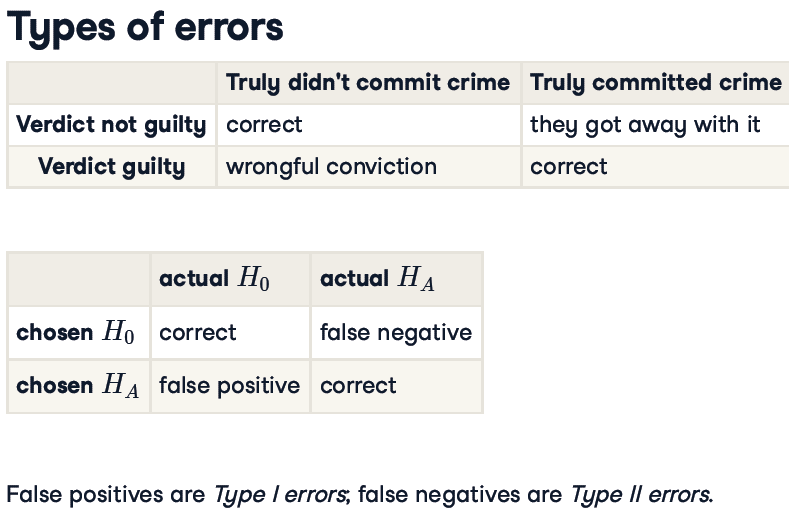

### ***Calculating a confidence interval***

If you give a single estimate of a sample statistic, you are bound to be wrong by some amount. For example, the hypothesized proportion of late shipments was 6%. Even if evidence suggests the null hypothesis that the proportion of late shipments is equal to this, for any new sample of shipments, the proportion is likely to be a little different due to sampling variability. Consequently, it's a good idea to state ***a confidence interval***. That is, you say, "we are 95% 'confident' that the proportion of late shipments is between A and B" (for some value of A and B).

Sampling in Python demonstrated two methods for calculating confidence intervals. Here, you'll use quantiles of the bootstrap distribution to calculate the confidence interval.

* Calculate a 95% confidence interval from `late_shipments_boot_distn` using the quantile method, labeling the lower and upper intervals `lower` and `upper`.

In [ ]:
import pandas as pd
import numpy as np

late_shipments = pd.read_feather('late_shipments.feather')
late_prop_samp = late_shipments[late_shipments['late']=='Yes']['late'].shape[0] / late_shipments.shape[0]
late_shipments_boot_distn = []
for i in range(5000):
    late_boot = late_shipments.sample(frac=1, replace=True)
    late_shipments_boot_distn.append(late_boot[late_boot['late']=='Yes']['late'].shape[0] / late_boot.shape[0])

# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn, 0.025)
upper = np.quantile(late_shipments_boot_distn, 0.975)

# Print the confidence interval
print((lower, upper))

(0.046, 0.076)


If the hypothesized population parameter is within the confidence interval, you should fail to reject the null hypothesis.

# ***Calculating groupwise summary statistics***

In [ ]:
import pandas as pd 
pd.options.display.float_format = '{:,.2f}'.format

stack_overflow = pd.read_feather('stack_overflow.feather')
stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()

age_first_code_cut
adult   111,313.31
child   132,419.57
Name: converted_comp, dtype: float64

# ***Approximated Standard Error of Mean Difference***

$$SE(\bar{x}_{\text{group1}} - \bar{x}_{\text{group2}}) \approx \sqrt{\frac{s^2_{\text{group1}}}{n_{\text{group1}}} + \frac{s^2_{\text{group2}}}{n_{\text{group2}}}}$$

* $H_0: \mu_{1} = \mu_{2} \Longrightarrow \mu_{1} - \mu_{2} = 0$

## ***Calculating the test statistic***

$$t = \frac{\bar{x}_1 - \bar{x}_2 - 0}{\sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}}$$

In [ ]:
import numpy as np

xbar = stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()
s = stack_overflow.groupby('age_first_code_cut')['converted_comp'].std()
n = stack_overflow.groupby('age_first_code_cut')['converted_comp'].count()

numerator = xbar['child'] - xbar['adult']
denominator = np.sqrt(s['child'] ** 2 / n['child'] + s['adult'] ** 2 / n['adult'])
t_stat = numerator / denominator
t_stat

1.8699313316221844

***Using bootstrap SE***


In [ ]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format

stack_overflow = pd.read_feather('stack_overflow.feather')
stack_boot_distn = []
for i in range(5000):
    stack_boot = stack_overflow.sample(frac=1, replace=True)
    xbar_boot = stack_boot.groupby('age_first_code_cut')['converted_comp'].mean()
    stack_boot_distn.append(xbar_boot['child'] - xbar_boot['adult'])

# ไม่แน่ใจควรใช้ ddof เท่าไหร่ในกรณีนี้
(xbar['child'] - xbar['adult']) / np.std(stack_boot_distn, ddof=1)

1.8726881185155095

จะเห็นว่าได้ค่าใกล้เคียงกัน

### ***Two sample mean test statistic***

While trying to determine why some shipments are late, you may wonder if the weight of the shipments that were on time is less than the weight of the shipments that were late. The late_shipments dataset has been split into a `"yes"` group, where `late == "Yes"` and a `"no"` group where `late == "No"`. The weight of the shipment is given in the `weight_kilograms` variable.

The sample means for the two groups are available as `xbar_no` and `xbar_yes`. The sample standard deviations are `s_no` and `s_yes`. The sample sizes are `n_no` and `n_yes`. `numpy` is also loaded as `np`.


* Calculate the numerator of the  test statistic.
* Calculate the denominator of the  test statistic.
* Use those two numbers to calculate the  test statistic.

In [ ]:
import pandas as pd
import numpy as np

late_shipments = pd.read_feather('late_shipments.feather')

xbar = late_shipments.groupby('late')['weight_kilograms'].mean()
s = late_shipments.groupby('late')['weight_kilograms'].std()
n = late_shipments.groupby('late')['weight_kilograms'].count()

xbar_yes, xbar_no, s_yes, s_no, n_yes, n_no = xbar['Yes'], xbar['No'], s['Yes'], s['No'], n['Yes'], n['No']
print(xbar_yes, xbar_no, s_yes, s_no, n_yes, n_no)

########################################################################

# Calculate the numerator of the test statistic
numerator = xbar_yes - xbar_no

# Calculate the denominator of the test statistic
denominator = np.sqrt(s_yes ** 2 / n_yes + s_no ** 2 / n_no)

# Calculate the test statistic
t_stat = numerator / denominator

# Print the test statistic
print(t_stat)

2715.6721311475408 1897.7912673056444 2544.688210903328 3154.0395070841687 61 939
2.3936661778766433


When testing for differences between means, ***the test statistic is called 't' rather than 'z'*** (ตรวจสอบอีกที), and can be calculated using six numbers from the samples. Here, the value is about -2.39 or 2.39, depending on the order you calculated the numerator.

# ***Calculating p-values for t-distribution***

* When a sample standard deviation is used in estimating a standard error เช่น

$$SE(\bar{x}_{\text{group1}} - \bar{x}_{\text{group2}}) \approx \sqrt{\frac{s^2_{\text{group1}}}{n_{\text{group1}}} + \frac{s^2_{\text{group2}}}{n_{\text{group2}}}}$$

* Using a sample standard deviation to estimate the standard error is computationally easier than using bootstrapping. However, to correct for the approximation, you need to use a t-distribution when transforming the test statistic to get the p-value.

In [ ]:
from scipy.stats import t

# right tailed
1 - t.cdf(t_stat, df=degrees_of_freedom)

# left tailed
t.cdf(t_stat, df=degrees_of_freedom)

In [ ]:
import pandas as pd 
import numpy as np
from scipy.stats import t

pd.options.display.float_format = '{:,.2f}'.format

stack_overflow = pd.read_feather('stack_overflow.feather')
stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()

xbar = stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()
s = stack_overflow.groupby('age_first_code_cut')['converted_comp'].std()
n = stack_overflow.groupby('age_first_code_cut')['converted_comp'].count()

numerator = xbar['child'] - xbar['adult']
denominator = np.sqrt(s['child'] ** 2 / n['child'] + s['adult'] ** 2 / n['adult'])
t_stat = numerator / denominator

# p-values for HA: 'age_first_code_cut child' >   'age_first_code_cut adult'
1 - t.cdf(t_stat, df=n['child']+n['adult']-2)

0.030811302165157595

Reject $H_0$: Evidence that Stack Overflow data scientists who started coding as a child earn more.

### ***From t to p***

Previously, you calculated the test statistic for the two-sample problem of whether the mean weight of shipments is smaller for shipments that weren't late (`late == "No"`) compared to shipments that were late (`late == "Yes"`). In order to make decisions about it, you need to transform the test statistic with a cumulative distribution function to get a p-value.

Recall the hypotheses:

$H_0$: The mean weight of shipments that weren't late is the same as the mean weight of shipments that were late.

$H_A$: The mean weight of shipments that weren't late is less than the mean weight of shipments that were late.

The test statistic, `t_stat`, is available, as are the samples sizes for each group, `n_no` and `n_yes`. Use a significance level of `alpha = 0.05`.

`t` has also been imported from `scipy.stats`.

* Calculate the degrees of freedom for the test.
* Compute the p-value using the test statistic, `t_stat`.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import t

late_shipments = pd.read_feather('late_shipments.feather')

xbar = late_shipments.groupby('late')['weight_kilograms'].mean()
s = late_shipments.groupby('late')['weight_kilograms'].std()
n = late_shipments.groupby('late')['weight_kilograms'].count()

xbar_yes, xbar_no, s_yes, s_no, n_yes, n_no = xbar['Yes'], xbar['No'], s['Yes'], s['No'], n['Yes'], n['No']

# Calculate the numerator of the test statistic
numerator = xbar_no - xbar_yes

# Calculate the denominator of the test statistic
denominator = np.sqrt(s_yes ** 2 / n_yes + s_no ** 2 / n_no)

# Calculate the test statistic
t_stat = numerator / denominator

################################################################################

# Calculate the degrees of freedom
degrees_of_freedom = n_yes + n_no - 2

# Calculate the p-value from the test stat
p_value = t.cdf(t_stat, df=degrees_of_freedom)

# Print the p_value
print(p_value)

0.008432382146249523


# ***Comaparing Means for Dependent Data***

* Question: Was the percentage of Republican candidate votes lower in 2008 than 2012?

$H_0: \mu_{2008} - \mu_{2012} = 0$

$H_A: \mu_{2008} - \mu_{2012} < 0$

* ถ้าตัวอย่างสัมพันธ์กัน ไม่ต้องจับแยกเป็นสองกลุ่ม ให้ทำคอลัมน์ใหม่ของผลต่าง แล้วทดสอบสมมติฐานตามนี้

$H_0: \mu_{\text{difference}} = 0$

$H_A: \mu_{\text{difference}} < 0$

$t = \dfrac{\bar{x}_{\text{diff}} - \bar{x}_{\text{diff}}}{\sqrt{\dfrac{s^2_{\text{diff}}}{n_{\text{diff}}}}}, df = n_{\text{diff}} - 1$

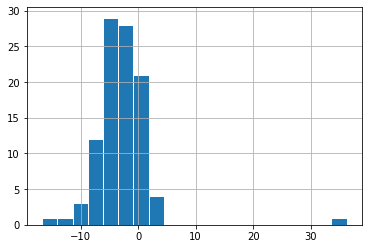

9.572537285272304e-08


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t
import numpy as np

repub_votes_potus_08_12 = pd.read_feather("repub_votes_potus_08_12.feather")
sample_data = repub_votes_potus_08_12
sample_data['diff'] = sample_data['repub_percent_08'] - sample_data['repub_percent_12']
sample_data['diff'].hist(bins=20, edgecolor='white')
plt.show()

xbar_diff = sample_data['diff'].mean()
n_diff = len(sample_data)
s_diff = sample_data['diff'].std()
t_stat = (xbar_diff-0) / np.sqrt(s_diff**2/n_diff)
degrees_of_freedom = n_diff - 1
p_value = t.cdf(t_stat, df=n_diff-1)
print(p_value)

# ***pingouin hypothesis testing package***

In [ ]:
import pingouin

pingouin.ttest(x=sample_data['diff'],
                # H_0 value
                y=0,
                # Left tailed
                alternative="less")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.560104,1.323e+05,1.0


# ***pingouin hypothesis testing for paired data***

In [ ]:
pingouin.ttest(x=sample_data['repub_percent_08'],
               y=sample_data['repub_percent_12'],
               paired=True,
               alternative="less")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.601043,99,less,9.572537e-08,"[-inf, -2.02]",0.217364,1.323e+05,0.696338


# ***ถ้าข้อมูลมันสัมพันธ์กัน อย่าให้ `paired=False`*** เพราะอาจจะผิดได้

* If you have repeated observations of something, then those observations form pairs.

In [ ]:
pingouin.ttest(x=sample_data['repub_percent_08'],
               y=sample_data['repub_percent_12'],
               paired=False,
               alternative="less")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.536997,198,less,0.062945,"[-inf, 0.22]",0.217364,0.927,0.454972


# ***Visualizing the difference***

Before you start running hypothesis tests, it's a great idea to perform some exploratory data analysis; that is, calculating summary statistics and visualizing distributions.

Here, you'll look at the proportion of county-level votes for the Democratic candidate in 2012 and 2016, `sample_dem_data`. Since the counties are the same in both years, these samples are ***paired***. The columns containing the samples are `dem_percent_12` and `dem_percent_16`.

`dem_votes_potus_12_16` is available as `sample_dem_data`. `pandas` and `matplotlib.pyplot` are loaded with their usual aliases.

* Create a new `diff` column containing the percentage of votes for the democratic candidate in 2012 minus the percentage of votes for the democratic candidate in 2016.

* Calculate the mean of the `diff` column as `xbar_diff`.

* Calculate the standard deviation of the `diff` column as `s_diff`.

* Plot a histogram of the `diff` column with `20` bins.

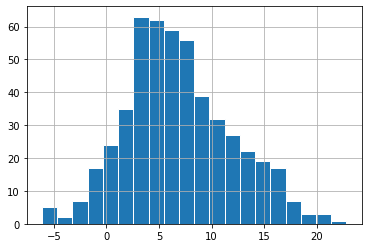

In [ ]:
import pandas as pd
import numpy as np

sample_dem_data = pd.read_feather('dem_votes_potus_12_16.feather')

# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins=20, edgecolor='white')
plt.show()

Notice that the majority of the histogram lies to the right of zero.

# ***Using ttest()***

Manually calculating test statistics and transforming them with a CDF to get a p-value is a lot of effort to compare two sample means. The comparison of two sample means is called a t-test, and the `pingouin` Python package has a `.ttest()` method to accomplish it. This method provides some flexibility in how you perform the test.

As in the previous exercise, you'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant.

`sample_dem_data` is available and has the columns `diff`, `dem_percent_12`, and `dem_percent_16` in addition to the state and county names. `pingouin` and has been loaded along with `pandas` as `pd`.

* Conduct a t-test on the sample differences (the `diff` column of `sample_dem_data`), using an appropriate alternative hypothesis chosen from "two-sided", "less", and "greater".

* Conduct a paired test on the democratic votes in 2012 and 2016 (the `dem_percent_12` and `dem_percent_16` columns of `sample_dem_data`), using an appropriate alternative hypothesis.

In [ ]:
# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'], y=0,alternative='two-sided')
display(test_results)

# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'], y=sample_dem_data['dem_percent_16'], paired=True, alternative="two-sided")
display(paired_test_results)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.298384,499,two-sided,3.600634e-115,"[6.39, 7.27]",1.354985,2.246e+111,1.0


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.298384,499,two-sided,3.600634e-115,"[6.39, 7.27]",0.454202,2.246e+111,1.0


When you have paired data, a ***paired t-test*** (set `paired=True` in `pingouin` package) is preferable to the unpaired version because it reduces the chance of a false negative error.

# ***ถ้าอยากทดสอบสมมติฐาน กรณีมีหลายกลุ่ม ทำไง***
# ***Visualizing multiple distributions***

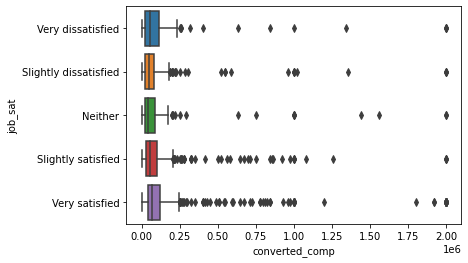

job_sat
Very dissatisfied       127,539.68
Slightly dissatisfied    96,643.32
Neither                 110,593.98
Slightly satisfied       96,084.99
Very satisfied          147,281.48
Name: converted_comp, dtype: float64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

stack_overflow = pd.read_feather('stack_overflow.feather')

sns.boxplot(x="converted_comp", y="job_sat", data=stack_overflow)
plt.show()

stack_overflow.groupby('job_sat')['converted_comp'].mean()

# ***Analysis of variance (ANOVA)***

* ทดสอบว่ามีความแตกต่างระหว่างกลุ่มหรือไม่ ?
* p-value อยู่ในคอลัมน์ p_unc

In [ ]:
import pingouin

pingouin.anova(data=stack_overflow,
               # dv คือ dependent variable
               dv="converted_comp",
               # กลุ่มที่จะทดสอบ
               between="job_sat")

,Source,ddof1,ddof2,F,p-unc,np2
0,job_sat,4,2256,4.48,0.00,0.01


* จากผลข้างบน สามารถสรุปได้ว่า มีอย่างน้อย 2 กลุ่มที่มีความแตกต่างกัน
* แต่เรายังไม่ทราบว่ากลุ่มไหน

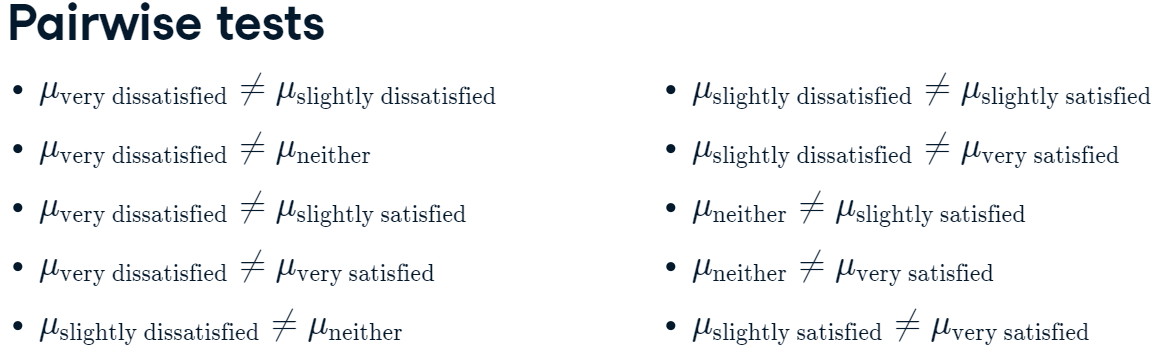

# ***pingouin `pairwise_ttests()`***

In [ ]:
pingouin.pairwise_ttests(data=stack_overflow,
                         dv="converted_comp",
                         between="job_sat",
                         padjust="none")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,job_sat,Slightly satisfied,Very satisfied,False,True,-4.01,"1,478.62",two-sided,0.00,158.564,-0.19
1,job_sat,Slightly satisfied,Neither,False,True,-0.70,258.20,two-sided,0.48,0.114,-0.07
2,job_sat,Slightly satisfied,Very dissatisfied,False,True,-1.24,187.15,two-sided,0.22,0.208,-0.15
3,job_sat,Slightly satisfied,Slightly dissatisfied,False,True,-0.04,569.93,two-sided,0.97,0.074,-0.00
4,job_sat,Very satisfied,Neither,False,True,1.66,328.33,two-sided,0.10,0.337,0.12
5,job_sat,Very satisfied,Very dissatisfied,False,True,0.75,221.67,two-sided,0.46,0.126,0.06
6,job_sat,Very satisfied,Slightly dissatisfied,False,True,3.08,821.30,two-sided,0.00,7.43,0.17
7,job_sat,Neither,Very dissatisfied,False,True,-0.55,321.17,two-sided,0.59,0.135,-0.06
8,job_sat,Neither,Slightly dissatisfied,False,True,0.60,367.73,two-sided,0.55,0.118,0.06
9,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.13,247.57,two-sided,0.26,0.197,0.12


# ***วิธีนี้ไม่ดี เพราะว่า ถ้ามีจำนวนกลุ่มที่ต้องการเปรียบเทียบมากขึ้น จะเจอ false positive มากขึ้น ให้ใช้ Bonferroni correction***

## ***ต้องมาดูคอลัมน์ p-corr แทน***

In [ ]:
pingouin.pairwise_ttests(data=stack_overflow,
                          dv="converted_comp",
                          between="job_sat",
                          padjust="bonf")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,job_sat,Slightly satisfied,Very satisfied,False,True,-4.01,"1,478.62",two-sided,0.00,0.00,bonf,158.564,-0.19
1,job_sat,Slightly satisfied,Neither,False,True,-0.70,258.20,two-sided,0.48,1.00,bonf,0.114,-0.07
2,job_sat,Slightly satisfied,Very dissatisfied,False,True,-1.24,187.15,two-sided,0.22,1.00,bonf,0.208,-0.15
3,job_sat,Slightly satisfied,Slightly dissatisfied,False,True,-0.04,569.93,two-sided,0.97,1.00,bonf,0.074,-0.00
4,job_sat,Very satisfied,Neither,False,True,1.66,328.33,two-sided,0.10,0.97,bonf,0.337,0.12
5,job_sat,Very satisfied,Very dissatisfied,False,True,0.75,221.67,two-sided,0.46,1.00,bonf,0.126,0.06
6,job_sat,Very satisfied,Slightly dissatisfied,False,True,3.08,821.30,two-sided,0.00,0.02,bonf,7.43,0.17
7,job_sat,Neither,Very dissatisfied,False,True,-0.55,321.17,two-sided,0.59,1.00,bonf,0.135,-0.06
8,job_sat,Neither,Slightly dissatisfied,False,True,0.60,367.73,two-sided,0.55,1.00,bonf,0.118,0.06
9,job_sat,Very dissatisfied,Slightly dissatisfied,False,True,1.13,247.57,two-sided,0.26,1.00,bonf,0.197,0.12


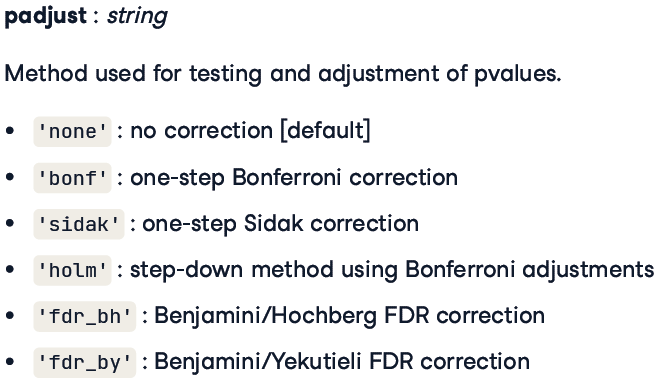

### ***Visualizing many categories***

So far in this chapter, we've only considered the case of differences in a numeric variable between two categories. Of course, many datasets contain more categories. Before you get to conducting tests on many categories, it's often helpful to perform exploratory data analysis (EDA), 

* calculating summary statistics for each group and 
* visualizing the distributions of the numeric variable for each category using box plots.

Here, we'll return to the late shipments data, and how the price of each package (`pack_price`) varies between the three shipment modes (`shipment_mode`): `"Air"`, `"Air Charter"`, and `"Ocean"`.

`late_shipments` is available; `pandas` and `matplotlib.pyplot` are loaded with their standard aliases, and `seaborn` is loaded as `sns`.

* Group `late_shipments` by `shipment_mode` and calculate the mean `pack_price` for each group, storing the result in `xbar_pack_by_mode`.

* Group `late_shipments` by `shipment_mode` and calculate the standard deviation `pack_price` for each group, storing the result in `s_pack_by_mode`.

* Create a boxplot from `late_shipments` with `"pack_price"` as `x` and `"shipment_mode"` as `y`.

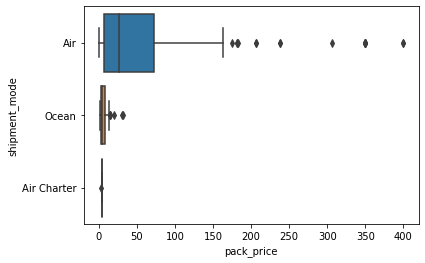

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

late_shipments = pd.read_feather('late_shipments.feather')

# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].mean()

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()

# Boxplot of shipment_mode vs. pack_price
sns.boxplot(x="pack_price", y="shipment_mode", data=late_shipments)
plt.show()

There certainly looks to be a difference in the pack price between each of the three shipment modes. Do you think the differences are statistically significant?

### ***ANOVA***

The box plots made it look like the distribution of pack price was different for each of the three shipment modes. However, it didn't tell us whether the mean pack price was different in each category. To determine that, we can use an ANOVA test. The null and alternative hypotheses can be written as follows.

$H_0$: Pack prices for every category of shipment mode are the same.

$H_A$: Pack prices for some categories of shipment mode are different.

We'll set a significance level of 0.1.

`late_shipments` is available and `pingouin` has been loaded.

* Run an ANOVA on `late_shipments` investigating `'pack_price'` (the dependent variable) between the groups of `'shipment_mode'`.

In [ ]:
import pingouin
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

late_shipments = pd.read_feather('late_shipments.feather')

# Run an ANOVA for pack_price across shipment_mode
pingouin.anova(data=late_shipments,dv='pack_price', between='shipment_mode')

,Source,ddof1,ddof2,F,p-unc,np2
0,shipment_mode,2,997,21.86,0.00,0.04


There is a significant difference in pack prices between the shipment modes. However, we don't know which shipment modes this applies to.

### ***Pairwise t-tests***

The ANOVA test didn't tell you which categories of shipment mode had significant differences in pack prices. To pinpoint which categories had differences, you could instead use pairwise t-tests.

`late_shipments` is available and `pingouin` has been loaded.

* Perform pairwise t-tests on `late_shipments`'s `pack_price` variable, grouped by `shipment_mode`, using Bonferroni correction.

In [ ]:
pingouin.pairwise_ttests(data=late_shipments, dv="pack_price", between="shipment_mode", padjust="bonf")

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,shipment_mode,Air,Air Charter,False,True,21.18,600.69,two-sided,0.00,0.00,bonf,5.809e+76,0.73
1,shipment_mode,Air,Ocean,False,True,19.34,986.98,two-sided,0.00,0.00,bonf,1.129e+67,0.71
2,shipment_mode,Air Charter,Ocean,False,True,-3.17,35.62,two-sided,0.00,0.01,bonf,15.277,-0.42


After applying the Bonferroni adjustment, the p-values for the t-tests between each of the three groups are all less than 0.1.

# ***Standardized test statistic for proportions***

* $p$: population proportion (unknown population parameter)
* $\hat p$: sample proportion (sample statistic)
* $p_0$ : hypothesized population proportion

Assuming $H_0$ is true, $p = p_0$ , so

$$z = \frac{\hat p - p_0}{SE(\hat p)}$$
$$SE(\hat p) = \sqrt{\left(\frac{p_0 (1-p_0)}{n} \right)}$$

## ***Stack Overflow age categories***

$H_0$ : Proportion of Stack Overflow users under thirty = 0.5

$H_A$ : Proportion of Stack Overflow users under thirty ≠ 0.5

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
pd.options.display.float_format = '{:,.2f}'.format

stack_overflow = pd.read_feather('stack_overflow.feather')
print(stack_overflow['age_cat'].value_counts(normalize=True))

p_hat = (stack_overflow['age_cat'] == 'Under 30').mean()
p_0 = 0.50
n = len(stack_overflow)

# z-score
z = (p_hat - p_0) / (np.sqrt(p_0 * (1 - p_0) / n))
p_value = 2 * (1 - norm.cdf(z))
print(p_value)

Under 30      0.54
At least 30   0.46
Name: age_cat, dtype: float64
0.0007094227368100725


# ***Test for single proportions***

In Chapter 1, you calculated a p-value for a test hypothesizing that the proportion of late shipments was greater than 6%. In that chapter, you used a bootstrap distribution to estimate the standard error of the statistic. An alternative is to use an equation for the standard error based on the sample proportion, hypothesized proportion, and sample size.

 $$z = \frac{\hat p - p_0}{\sqrt{\left(\frac{p_0 (1-p_0)}{n} \right)}}$$
 
You'll revisit the p-value using this simpler calculation.

`late_shipments` is available. `pandas` and `numpy` are available under their usual aliases, and `norm` is loaded `from scipy.stats`.

* Hypothesize that the proportion of late shipments is `6%`.
* Calculate the sample proportion of shipments where late equals `"Yes"`.
* Calculate the number of observations in the sample.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
pd.options.display.float_format = '{:,.2f}'.format

late_shipments = pd.read_feather('late_shipments.feather')

# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == "Yes").mean()

# Calculate the sample size
n = len(late_shipments)

# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)

# Calculate the test statistic
z_score = numerator / denominator

# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print the p-value
print(p_value)

0.44703503936503364


While bootstrapping can be used to estimate the standard error of any statistic, it is computationally intensive. For proportions, using a simple equation of the hypothesized proportion and sample size is easier to compute.

# ***Comparing two proportions***

* $H_0$ : Proportion of hobbyist users is the same for those under thirty as those at least thirty
   * $p_{\geq 30} − p_{<30} = 0$

* $H_A$ : Proportion of hobbyist users is different for those under thirty to those at least thirty.
  * $p_{\geq 30} − p_{<30} \neq 0$

## ***Calculating the z-score***

$$Z = \frac{\hat{p}_{\geq 30} − \hat p_{<30} - 0}{SE(\hat p≥30 − \hat p <30)}$$
$$SE(\hat p≥30 − \hat p <30) = \sqrt{\frac{\hat p \times (1-\hat p)}{n_{\geq 30}} + \frac{\hat p \times (1-\hat p)}{n_{< 30}}}$$

* $\hat p$: pooled estimate for $ p$ (common unknown proportion of successes)

$$\hat p = \frac{n_{\geq 30} \times \hat p_{\geq 30} + n_{<30} \times \hat p_{<30}}{n_{\geq 30} + n_{<30}}$$

* Need to calculate 4 numbers: $\hat p_{\geq 30}, \hat p_{<30}, n_{\geq 30}, n_{<30}$

## ***Getting the numbers for the z-score***



In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
pd.options.display.float_format = '{:,.2f}'.format

stack_overflow = pd.read_feather('stack_overflow.feather')

p_hats = stack_overflow.groupby("age_cat")['hobbyist'].value_counts(normalize=True)
print(stack_overflow.groupby("age_cat")['hobbyist'].value_counts(), "\n")
print(p_hats, "\n\n\n")

n = stack_overflow.groupby("age_cat")['hobbyist'].count()
print(n)

p_hat_at_least_30 = p_hats[("At least 30", "Yes")]
p_hat_under_30 = p_hats[("Under 30", "Yes")]
print(p_hat_at_least_30, p_hat_under_30, "\n")

n_at_least_30 = n["At least 30"]
n_under_30 = n["Under 30"]
print(n_at_least_30, n_under_30)

p_hat = (n_at_least_30 * p_hat_at_least_30 + n_under_30 * p_hat_under_30) / (n_at_least_30 + n_under_30)

std_error = np.sqrt(p_hat * (1-p_hat) / n_at_least_30 + p_hat * (1-p_hat) / n_under_30)

z_score = (p_hat_at_least_30 - p_hat_under_30) / std_error

print(z_score)

age_cat      hobbyist
At least 30  Yes          812
             No           238
Under 30     Yes         1021
             No           190
Name: hobbyist, dtype: int64 

age_cat      hobbyist
At least 30  Yes        0.77
             No         0.23
Under 30     Yes        0.84
             No         0.16
Name: hobbyist, dtype: float64 



age_cat
At least 30    1050
Under 30       1211
Name: hobbyist, dtype: int64
0.7733333333333333 0.8431048720066061 

1050 1211
-4.223691463320559


# ***Proportion tests using `proportions_ztest()`***

In [ ]:
age_by_hobbyist = stack_overflow.groupby("age_cat")['hobbyist'].value_counts()
age_by_hobbyist

age_cat      hobbyist
At least 30  Yes          812
             No           238
Under 30     Yes         1021
             No           190
Name: hobbyist, dtype: int64

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

success_counts = np.array([812, 1021])
n = np.array([812 + 238, 1021 + 190])

stat, p_value = proportions_ztest(count=success_counts, nobs=n, alternative="two-sided")
stat, p_value

(-4.223691463320559, 2.403330142685068e-05)

### ***Test for two proportions***

You may wonder if the amount paid for freight affects whether or not the shipment was late. Recall that in the `late_shipments` dataset, whether or not the shipment was late is stored in the `late` column. Freight costs are stored in the `freight_cost_group` column, and the categories are `"expensive"` and `"reasonable"`.

The hypotheses to test, with `"late"` corresponding to the proportion of late shipments for that group, are

$$H_0: late_{\text{expensive}} - late_{\text{reasonable}} = 0$$
$$H_A: late_{\text{expensive}} - late_{\text{reasonable}} > 0$$

`p_hats` contains the estimates of population proportions (sample proportions) for the `"expensive"` and `"reasonable"` groups. `ns` contains the sample sizes for these groups. `p_hats` and `ns` have been printed for you.

`pandas` and `numpy` have been imported under their usual aliases, and `norm` is available `from scipy.stats`.

* Calculate the pooled sample proportion, $\hat p$, from `p_hats` and `ns`.

$$
\hat{p} = \frac{n_{\text{expensive}} \times \hat{p}_{\text{expensive}} + n_{\text{reasonable}} \times \hat{p}_{\text{reasonable}}}{n_{\text{expensive}} + n_{\text{reasonable}}}
$$

* Calculate the standard error of the sample using this equation.

$$
\text{SE}(\hat{p}_{\text{expensive}} - \hat{p}_{\text{reasonable}}) = \sqrt{\dfrac{\hat{p} \times (1 - \hat{p})}{n_{\text{expensive}}} + \dfrac{\hat{p} \times (1 - \hat{p})}{n_{\text{reasonable}}}}
$$

* Calculate the pooled sample proportion times one minus the pooled sample proportion.

* Divide `p_hat_times_not_p_hat` by the sample sizes and sum those two values.

* Calculate the square root of `p_hat_times_not_p_hat_over_ns`.

* Calculate the z-score using the following equation.

$$
z = \frac{(\hat{p}_{\text{expensive}} - \hat{p}_{\text{reasonable}})}{\text{SE}(\hat{p}_{\text{expensive}} - \hat{p}_{\text{reasonable}})}
$$


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
pd.options.display.float_format = '{:,.3f}'.format

late_shipments = pd.read_feather('late_shipments.feather')

p = late_shipments.groupby('freight_cost_groups')['late'].value_counts(normalize=True)
p_hats = late_shipments.groupby('freight_cost_groups')['late'].apply(lambda x: x.value_counts(normalize=True).tail(1))
ns = late_shipments.groupby('freight_cost_groups')['late'].count()

##############################################################################

# Calculate the pooled estimate of the population proportion
p_hat = (p_hats["reasonable"] * ns["reasonable"] + p_hats["expensive"] * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])

# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / ns["expensive"] + p_hat_times_not_p_hat / ns["reasonable"]

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Calculate the z-score
z_score = (p_hats[("expensive", "Yes")] - p_hats[("reasonable", "Yes")]) / std_error['Yes']

# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print p_value
print(p_value)


0.0017353400023595311


You can calculate a p-value for a two sample proportion test using (a rather exhausting amount of) arithmetic. This tiny p-value leads us to suspect there is a larger proportion of late shipments for expensive freight compared to reasonable freight.

### ***proportions_ztest() for two samples***

That took a lot of effort to calculate the p-value, so while it is useful to see how the calculations work, it isn't practical to do in real-world analyses. For daily usage, it's better to use the `statsmodels` package.

Recall the hypotheses.
$$late_{\text{expensive}} -  late_{\text{reasonable}} = 0$$
$$late_{\text{expensive}} -  late_{\text{reasonable}} > 0$$

`late_shipments` is available, containing the `freight_cost_groups` column. `numpy` and `pandas` have been loaded under their standard aliases, and `proportions_ztest` has been loaded `from statsmodels.stats.proportion`.


* Get the counts of the late column grouped by `freight_cost_group`.

* Extract the number of `"Yes"`'s for the two groups into a numpy array, specifying the `'expensive'` count and then `'reasonable'`.
* Determine the overall number of rows in each `freight_cost_group` as a `numpy` array, specifying `'expensive'` and then `'reasonable'`.
* Run a z-test using `proportions_ztest()`, specifying alternative as `"larger"`.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest

pd.options.display.float_format = '{:,.3f}'.format

late_shipments = pd.read_feather('late_shipments.feather')

# Count the late column values for each freight_cost_group
# Same output below
# late_shipments.groupby(['freight_cost_groups', 'late'])['late'].count() 
late_by_freight_cost_group = late_shipments.groupby('freight_cost_groups')['late'].value_counts()

# Print the counts
print(late_by_freight_cost_group)

# Put the two "Yes" counts into an array
success_counts = np.array([late_by_freight_cost_group[('expensive', 'Yes')], late_by_freight_cost_group[('reasonable', 'Yes')]])

# Put the two group counts into an array
n = np.array([late_by_freight_cost_group[('expensive', 'Yes')] +  late_by_freight_cost_group[('expensive', 'No')],  late_by_freight_cost_group[('reasonable', 'Yes')] +  late_by_freight_cost_group[('reasonable', 'No')]])

# Run a z-test on the two proportions
stat, p_value = proportions_ztest(count=success_counts, nobs=n,
alternative="larger")


# Print the results
print(stat, p_value)

freight_cost_groups  late
expensive            No      489
                     Yes      42
reasonable           No      439
                     Yes      16
Name: late, dtype: int64
2.922648567784529 0.001735340002359578


# ***Independence of variables***

* $H_0$ : Proportion of hobbyist users is the same for those under thirty as those at least thirty
   * $p_{\geq 30} − p_{<30} = 0$

* $H_A$ : Proportion of hobbyist users is different for those under thirty to those at least thirty.
  * $p_{\geq 30} − p_{<30} \neq 0$

* Previous hypothesis test result: evidence that `hobbyist` and `age_cat` are associated -- The small p-value suggested that there was evidence that the `hobbyist` and `age_cat` variables had an association.

## ***Statistical independence***  
* **proportion of successes in the response variable is the same** across all categories of the explanatory variable

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest
pd.options.display.float_format = '{:,.2f}'.format

stack_overflow = pd.read_feather('stack_overflow.feather')
age_by_hobbyist = stack_overflow.groupby("age_cat")['hobbyist'].value_counts()

success_counts = np.array([age_by_hobbyist[('At least 30',  'Yes')], age_by_hobbyist[('Under 30',  'Yes')]])
n = np.array([age_by_hobbyist[('At least 30',  'Yes')] + age_by_hobbyist[('At least 30',  'No')], age_by_hobbyist[('Under 30',  'Yes')] + age_by_hobbyist[('Under 30',  'No')]])
stat, p_value = proportions_ztest(count=success_counts, nobs=n, alternative="two-sided")
stat, p_value

(-4.223691463320559, 2.403330142685068e-05)

# ***$\chi^2 $ Test for independence of variables***

In [ ]:
import pingouin

expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, 
                                                       x='hobbyist', 
                                                       y='age_cat', 
                                                       correction=False)
display(stats)

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.00,17.84,1.00,0.00,0.09,0.99
1,cressie-read,0.67,17.82,1.00,0.00,0.09,0.99
2,log-likelihood,0.00,17.80,1.00,0.00,0.09,0.99
3,freeman-tukey,-0.50,17.82,1.00,0.00,0.09,0.99
4,mod-log-likelihood,-1.00,17.85,1.00,0.00,0.09,0.99
5,neyman,-2.00,17.98,1.00,0.00,0.09,0.99


* $\chi^2$ statistic = 17.84 = $(-4.223691463320559)^2 = $ ($z$-score$)^2$  


In [ ]:
(-4.223691463320559)**2

17.83956957732697

## ***Test for Independence for Job satisfaction and age category***

In [ ]:
print(stack_overflow['age_cat'].value_counts(), "\n")
print(stack_overflow['job_sat'].value_counts())

Under 30       1211
At least 30    1050
Name: age_cat, dtype: int64 

Very satisfied           879
Slightly satisfied       680
Slightly dissatisfied    342
Neither                  201
Very dissatisfied        159
Name: job_sat, dtype: int64


## ***Exploratory visualization: proportional stacked bar plot***

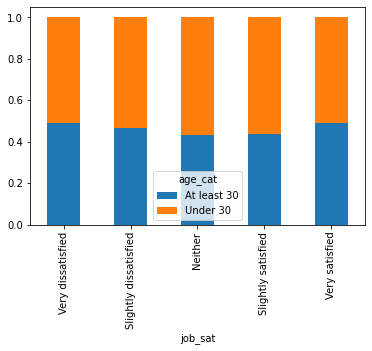

In [ ]:
import matplotlib.pyplot as plt

props = stack_overflow.groupby('job_sat')['age_cat'].value_counts(normalize=True)
wide_props = props.unstack()
wide_props.plot(kind="bar", stacked=True)
plt.show()

## ***Chi-square independence test***

In [ ]:
import pingouin
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x="job_sat", y="age_cat")
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.00,5.55,4.00,0.24,0.05,0.44
1,cressie-read,0.67,5.55,4.00,0.24,0.05,0.44
2,log-likelihood,0.00,5.56,4.00,0.23,0.05,0.44
3,freeman-tukey,-0.50,5.56,4.00,0.23,0.05,0.44
4,mod-log-likelihood,-1.00,5.57,4.00,0.23,0.05,0.44
5,neyman,-2.00,5.58,4.00,0.23,0.05,0.44


* p_value is 0.24 so `age_cat` is independent from `job_sat`

### ***Chi-square test of independence***

The chi-square independence test compares proportions of successes of one categorical variable across the categories of another categorical variable.

Trade deals often use a form of business shorthand in order to specify the exact details of their contract. These are International Chamber of Commerce (ICC) international commercial terms, or incoterms for short.

The `late_shipments` dataset includes a `vendor_inco_term` that describes the incoterms that applied to a given shipment. The choices are:

* [EXW](https://www.investopedia.com/terms/e/exw.asp): "Ex works". The buyer pays for transportation of the goods.
* [CIP](https://www.investopedia.com/terms/c/carriage-and-insurance-paid-cip.asp): "Carriage and insurance paid to". The seller pays for freight and insurance until the goods board a ship.
* [DDP](https://www.investopedia.com/terms/d/delivery-duty-paid.asp): "Delivered duty paid". The seller pays for transportation of the goods until they reach a destination port.
* [FCA](https://www.investopedia.com/terms/f/fca.asp): "Free carrier". The seller pays for transportation of the goods.

Perhaps the incoterms affect whether or not the freight costs are expensive. Test these hypotheses with a significance level of `0.01`.

$H_0$: `vendor_inco_term` and `freight_cost_groups` are independent.

$H_A$: `vendor_inco_term` and `freight_cost_groups` are associated.

`late_shipments` is available, and the following have been loaded: `matplotlib.pyplot` as `plt`, `pandas` as `pd`, and `pingouin`.

* Calculate the proportion of `freight_cost_groups` in `late_shipments` grouped by `vendor_inco_term`.

* Unstack the `.value_counts()` result to be in wide format instead of long.

* Create a proportional stacked bar plot with bars filled based on `freight_cost_groups` across the levels of `vendor_inco_term`.

* Perform a chi-square test of independence on `freight_cost_groups` and `vendor_inco_term` in the `late_shipments` dataset.

vendor_inco_term  freight_cost_groups
CIP               reasonable            0.68
                  expensive             0.32
DDP               expensive             0.55
                  reasonable            0.45
DDU               reasonable            1.00
EXW               expensive             0.58
                  reasonable            0.42
FCA               reasonable            0.66
                  expensive             0.34
Name: freight_cost_groups, dtype: float64 



freight_cost_groups,expensive,reasonable
vendor_inco_term,,
CIP,0.32,0.68
DDP,0.55,0.45
DDU,NaN,1.00
EXW,0.58,0.42
FCA,0.34,0.66


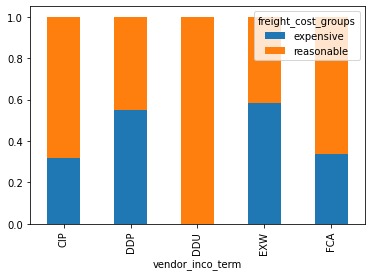

      test  lambda  chi2  dof  pval  cramer  power
0  pearson    1.00 34.81 4.00  0.00    0.19   1.00


/usr/local/lib/python3.7/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))
/usr/local/lib/python3.7/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn('Low count on {} frequencies.'.format(name))
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6716: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6716: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6713: RuntimeWarning: divide by zero encountered in true_divide
  terms = 2.0 * special.xlogy(f_exp, f_exp / f_obs)


In [ ]:
import pandas as pd
import numpy as np
import pingouin
import matplotlib.pyplot as plt 
pd.options.display.float_format = '{:,.2f}'.format

late_shipments = pd.read_feather('late_shipments.feather')

# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts(normalize=True)
# Print props
print(props, "\n")

# Convert props to wide format
wide_props = props.unstack()
# Print wide_props
display(wide_props)

# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind="bar", stacked=True)
plt.show()

# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pingouin.chi2_independence(data=late_shipments, x="freight_cost_groups", y="vendor_inco_term")
# Print results
print(stats[stats['test'] == 'pearson']) 

Reject the null hypothesis and conclude that `vendor_inco_term` and `freight_cost_groups` are associated.   The test to compare proportions of successes in a categorical variable across groups of another categorical variable is called a ***chi-square test of independence***.

# ***chi-square goodness of fit test***

```
hypothesized = pd.DataFrame({'purple_link': ['Hello, old friend', 'Amused', 'Indifferent', 'Annoyed'], 'prop': [1/2, 1/6, 1/6, 1/6]})
```

* $H_0$ : The sample matches with the
hypothesized distribution
* $H_A$ : The sample does not match with the
hypothesized distribution

  * $\chi^2$ measures how far observed results are from hypothesis in each group

In [17]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest
pd.options.display.float_format = '{:,.2f}'.format

stack_overflow = pd.read_feather('stack_overflow.feather')
purple_link_counts = stack_overflow['purple_link'].value_counts()
purple_link_counts = purple_link_counts.rename_axis('purple_link').reset_index(name='n')
display(purple_link_counts)

hypothesized = pd.DataFrame({'purple_link': ['Hello, old friend', 'Amused', 'Indifferent', 'Annoyed'],
                             'prop':        [ 1/2,                   1/6,         1/6,         1/6]})
print('Hypothesis')
display(hypothesized)

,purple_link,n
0,"Hello, old friend",1225
1,Indifferent,405
2,Amused,368
3,Annoyed,263


Hypothesis


,purple_link,prop
0,"Hello, old friend",0.50
1,Amused,0.17
2,Indifferent,0.17
3,Annoyed,0.17


## ***Hypothesized counts by category***



In [18]:
n_total = len(stack_overflow)
hypothesized["n"] = hypothesized["prop"] * n_total
display(hypothesized)

,purple_link,prop,n
0,"Hello, old friend",0.50,"1,130.50"
1,Amused,0.17,376.83
2,Indifferent,0.17,376.83
3,Annoyed,0.17,376.83


## ***Visualizing counts***



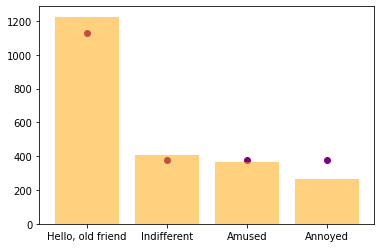

In [22]:
import matplotlib.pyplot as plt

plt.bar(purple_link_counts['purple_link'], purple_link_counts['n'], color="orange", alpha=0.5)
plt.scatter(hypothesized['purple_link'], hypothesized['n'], color="purple")
plt.show()

## ***Goodness of Fit***

In [23]:
from scipy.stats import chisquare

chisquare(f_obs=purple_link_counts['n'], f_exp=hypothesized['n'])

Power_divergenceResult(statistic=44.59840778416629, pvalue=1.1261810719413759e-09)

### ***Visualizing goodness of fit***

The chi-square goodness of fit test compares proportions of each level of a categorical variable to hypothesized values. Before running such a test, it can be helpful to ***visually compare the distribution in the sample to the hypothesized distribution***.

Recall the vendor incoterms in the `late_shipments` dataset. You hypothesize that the four values occur with these frequencies in the population of shipments.

* `EXW`: 0.75
* `CIP`: 0.05
* `DDP`: 0.1
* `FCA`: 0.1

These frequencies are stored in the `hypothesized` DataFrame.

* The `incoterm_counts` DataFrame stores the `.value_counts()` of the `vendor_inco_term` column.

`late_shipments` is available; `pandas` and `matplotlib.pyplot` are loaded with their standard aliases.


* Find the number of rows in `late_shipments`.
* Add a column named `n` to the hypothesized DataFrame storing the `prop` column times `n_total`.

In [38]:
import pandas as pd
import numpy as np
import pingouin
import matplotlib.pyplot as plt 
pd.options.display.float_format = '{:,.2f}'.format

late_shipments = pd.read_feather('late_shipments.feather')
incoterm_counts = late_shipments['vendor_inco_term'].value_counts().rename_axis('vendor_inco_term').reset_index(name='n').drop(4)
display(incoterm_counts)

hypothesized = pd.DataFrame({'vendor_inco_term':['EXW', 'CIP', 'DDP', 'FCA'], 'prop':[0.75, 0.05, 0.10, 0.10]})
display(hypothesized)

# Find the number of rows in late_shipments
n_total = late_shipments.shape[0]

# Print n_total
print(n_total)

# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Create n column that is prop column * n_total
hypothesized['n'] = hypothesized['prop'] * n_total

# Print the modified hypothesized DataFrame
display(hypothesized)

,vendor_inco_term,n
0,EXW,732
1,FCA,111
2,DDP,100
3,CIP,56


,vendor_inco_term,prop
0,EXW,0.75
1,CIP,0.05
2,DDP,0.10
3,FCA,0.10


1000


,vendor_inco_term,prop,n
0,EXW,0.75,750.00
1,CIP,0.05,50.00
2,DDP,0.10,100.00
3,FCA,0.10,100.00


* Create a bar graph of `'n'` versus `'vendor_inco_term'` for the `incoterm_counts` data, specifying a yellow color and an `alpha` of `0.5`.

* Add blue points to the plot showing the results from `hypothesized`.



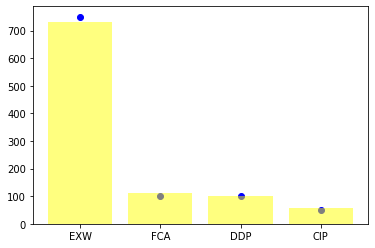

In [39]:
# Find the number of rows in late_shipments
n_total = len(late_shipments)

# Create n column that is prop column * n_total
hypothesized["n"] = hypothesized["prop"] * n_total

# Make a yellow bar graph of vendor_inco_term versus n
plt.bar(incoterm_counts['vendor_inco_term'], incoterm_counts['n'], color="yellow", alpha=0.5)

# Add blue points for hypothesized counts
plt.scatter(hypothesized['vendor_inco_term'], hypothesized['n'], color="blue")
plt.show()

### ***Chi-square test of goodness of fit***

The bar plot of `vendor_inco_term` suggests that the distribution across the four categories was quite close to the hypothesized distribution. You'll need to perform a chi-square goodness of fit test to see whether the differences are statistically significant.

Recall the hypotheses for this type of test:

$H_0$: The sample matches with the hypothesized distribution.

$H_A$: The sample does not match with the hypothesized distribution.

To decide which hypothesis to choose, we'll set a significance level of 0.1.

`late_shipments`, `incoterm_counts`, and `hypothesized` from the last exercise are available. `chisquare` `from scipy.stats` has been loaded.

* Using the `incoterm_counts` and `hypothesized` datasets, perform a chi-square goodness of fit test on `vendor_inco_term`.

In [47]:
import pandas as pd
import numpy as np
import pingouin
import matplotlib.pyplot as plt 
from scipy.stats import chisquare

pd.options.display.float_format = '{:,.2f}'.format

late_shipments = pd.read_feather('late_shipments.feather')
incoterm_counts = late_shipments['vendor_inco_term'].value_counts().rename_axis('vendor_inco_term').reset_index(name='n').drop(4)
hypothesized = pd.DataFrame({'vendor_inco_term':['EXW', 'CIP', 'DDP', 'FCA'], 'prop':[0.75, 0.05, 0.10, 0.10]})
n_total = len(late_shipments) - 1 # ในข้อมูลมีค่าเพี้ยนไปตัวนึง  
hypothesized['n'] = hypothesized['prop'] * n_total
display(incoterm_counts)
display(hypothesized)
###############################################################################

# Perform a goodness of fit test on vendor_inco_term
gof_test = chisquare(f_obs=incoterm_counts['n'], f_exp=hypothesized['n'])


# Print gof_test results
print(gof_test)


,vendor_inco_term,n
0,EXW,732
1,FCA,111
2,DDP,100
3,CIP,56


,vendor_inco_term,prop,n
0,EXW,0.75,749.25
1,CIP,0.05,49.95
2,DDP,0.10,99.90
3,FCA,0.10,99.90


Power_divergenceResult(statistic=94.3053053053053, pvalue=2.6037864328450376e-20)


Reject the null hypothesis and conclude that `vendor_inco_term` does not follow the distribution specified by `hypothesized_props`.

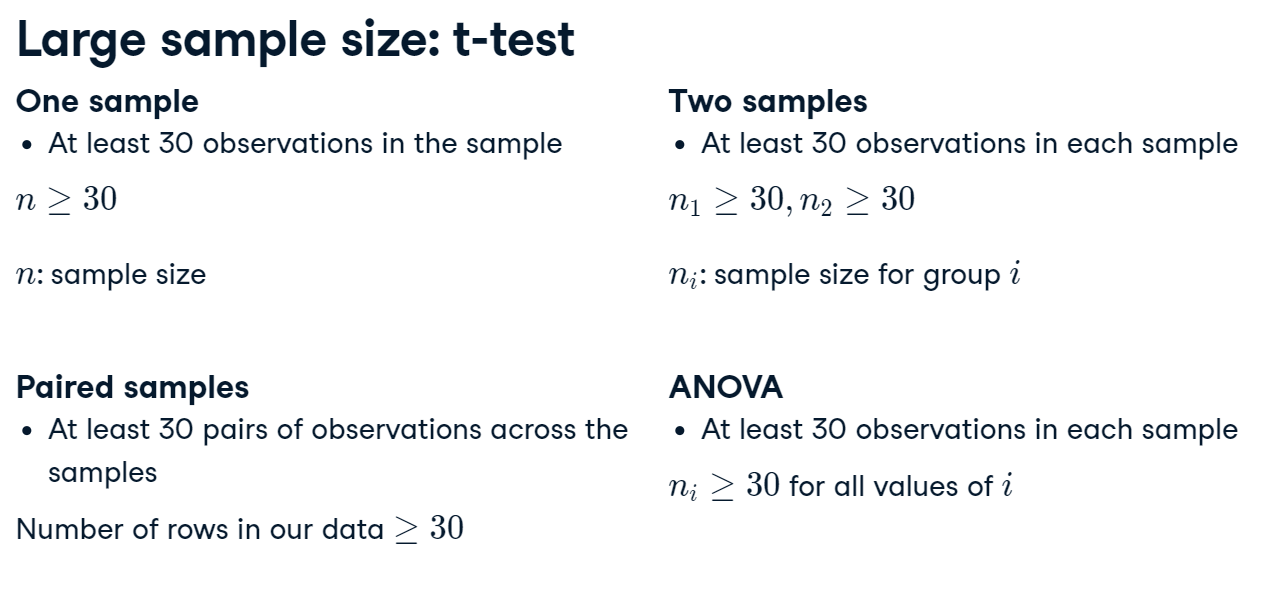

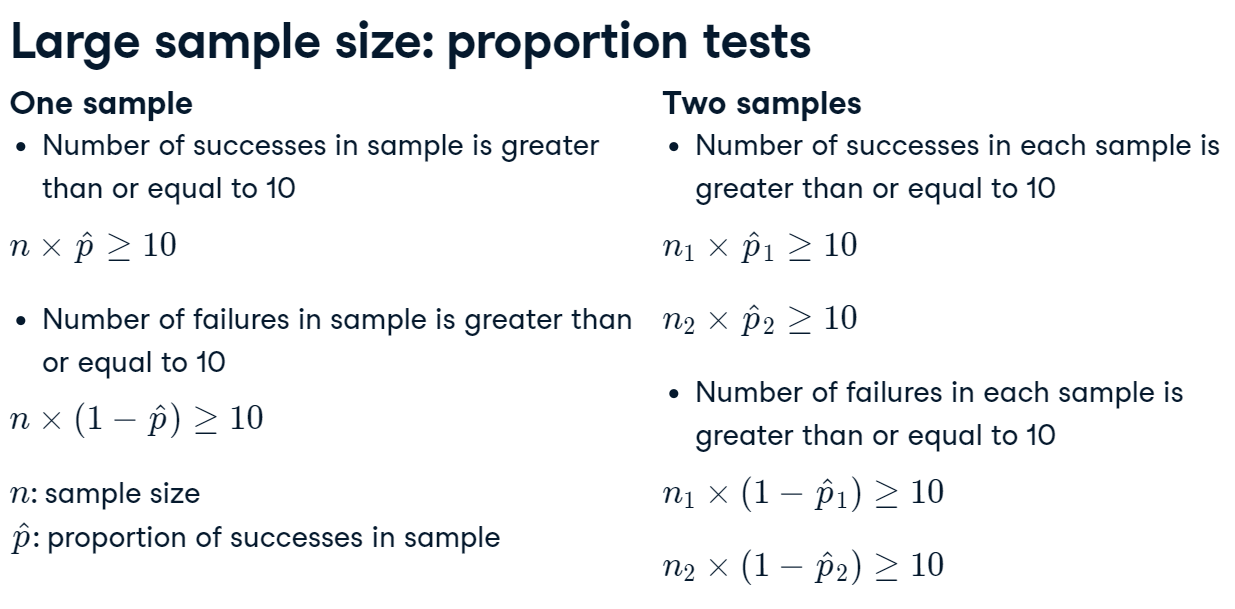

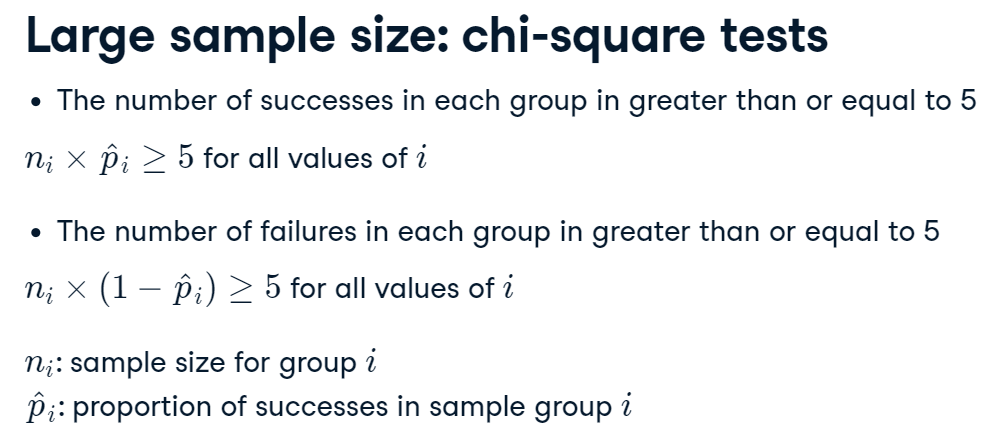

# ***Sanity check***

If the bootstrap distribution doesn't look normal, assumptions likely aren't valid.  เก็บตัวอย่างมาอาจจะน้อยไป

Revisit data collection to check for randomness, independence, and sample size

### ***Testing sample size***

In order to conduct a hypothesis test and be sure that the result is fair, a sample must meet three requirements: 

1. it is a random sample of the population 
2. the observations are independent
3. there are enough observations 

Of these, only the last condition is easily testable with code.

The minimum sample size depends on the type of hypothesis tests you want to perform. You'll now test some scenarios on the `late_shipments` dataset.

Note that the `.all()` method from pandas can be used to check if all elements are true. For example, given a DataFrame `df` with numeric entries, you check to see if all its elements are less than `5`, using `(df < 5).all()`.

`late_shipments` is available, and `pandas` is loaded as `pd`.

* Get the count of each value in the `freight_cost_group` column of `late_shipments`.

* Insert a suitable number to inspect whether the counts are "big enough" for a two sample t-test.



In [1]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format

late_shipments = pd.read_feather('late_shipments.feather')

# Count the freight_cost_group values
counts = late_shipments['freight_cost_groups'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())



expensive     531
reasonable    455
Name: freight_cost_groups, dtype: int64
True


* Get the count of each value in the late column of `late_shipments`.
* Insert a suitable number to inspect whether the counts are "big enough" for a one sample proportion test.

In [2]:
# Count the late values
counts = late_shipments['late'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 10).all())

No     939
Yes     61
Name: late, dtype: int64
True


* Get the count of each value in the `freight_cost_group` column of `late_shipments` grouped by `vendor_inco_term`.

* Insert a suitable number to inspect whether the counts are "big enough" for a chi-square independence test.

In [4]:
# Count the values of freight_cost_group grouped by vendor_inco_term
counts = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 5).all())

vendor_inco_term  freight_cost_groups
CIP               reasonable              34
                  expensive               16
DDP               expensive               55
                  reasonable              45
DDU               reasonable               1
EXW               expensive              423
                  reasonable             302
FCA               reasonable              73
                  expensive               37
Name: freight_cost_groups, dtype: int64
False


* Get the count of each value in the `shipment_mode` column of `late_shipments`.
* Insert a suitable number to inspect whether the counts are "big enough" for an ANOVA test.

In [5]:
# Count the shipment_mode values
counts = late_shipments['shipment_mode'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

Air            906
Ocean           88
Air Charter      6
Name: shipment_mode, dtype: int64
False


 we should be a little cautious of the ANOVA test results given the small sample size for Air Charter.

In [1]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

repub = pd.read_feather('repub_votes_potus_08_12.feather')
repub_votes_small = repub.iloc[[80, 84, 33, 81, 93]]
repub_votes_small

,state,county,repub_percent_08,repub_percent_12
80,Texas,Red River,68.51,69.94
84,Texas,Walker,60.71,64.97
33,Kentucky,Powell,57.06,61.73
81,Texas,Schleicher,74.39,77.38
93,West Virginia,Morgan,60.86,64.07


# ***Small Sample Results with `pingouin.ttest()`***

* Recall we need at least 30 pairs of observations across the samples.

In [2]:
import pingouin

pingouin.ttest(x=repub_votes_small['repub_percent_08'], y=repub_votes_small['repub_percent_12'],
               paired=True, alternative="less")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.88,4,less,0.00,"[-inf, -2.11]",0.50,26.468,0.24


ถ้าตัวอย่างงเล็กขนาดนี้ ทำให้ข้อสมมติเรื่องจำนวนตัวอย่างไม่เป็นจริง ควรใช้ 

# ***Non-parametric Tests***

* Non-parametric tests avoid the parametric assumptions and conditions
* Non-parametric tests are more reliable than parametric tests for ***small sample sizes*** and when ***data isn't normally distributed***
* Many non-parametric tests use ranks of the data

## ***Wilcoxon-signed rank test***

* Works on the ***ranked absolute differences*** between the pairs of data





In [3]:
from scipy.stats import rankdata

x = [1, 15, 3, 10, 6]
rankdata(x)

array([1., 5., 2., 4., 3.])

## ***Steps***

In [5]:
from scipy.stats import rankdata

repub_votes_small['diff'] = repub_votes_small['repub_percent_08'] - repub_votes_small['repub_percent_12']
repub_votes_small['abs_diff'] = repub_votes_small['diff'].abs()
repub_votes_small['rank_abs_diff'] = rankdata(repub_votes_small['abs_diff'])
repub_votes_small

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,state,county,repub_percent_08,repub_percent_12,diff,abs_diff,rank_abs_diff
80,Texas,Red River,68.51,69.94,-1.44,1.44,1.00
84,Texas,Walker,60.71,64.97,-4.26,4.26,4.00
33,Kentucky,Powell,57.06,61.73,-4.67,4.67,5.00
81,Texas,Schleicher,74.39,77.38,-3.00,3.00,2.00
93,West Virginia,Morgan,60.86,64.07,-3.21,3.21,3.00


In [7]:
import numpy as np

T_minus = 1 + 4 + 5 + 2 + 3 # Sum ranks of row with negative differences
T_plus = 0 # Sum ranks of row with positive differences
W = np.min([T_minus, T_plus])

## ***Implementation with `pingouin.wilcoxon()`***

In [9]:
pingouin.wilcoxon(x=repub_votes_small['repub_percent_08'],
                  y=repub_votes_small['repub_percent_12'],
                  alternative="less")

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.00,less,0.03,-1.00,0.72


### ***Wilcoxon signed-rank test***

You'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant.

`sample_dem_data` is available, and has columns `dem_percent_12` and `dem_percent_16` in addition to state and county names. The following packages have also been loaded: `pingouin` and `pandas` as `pd`.

* Conduct a paired t-test on the percentage columns using an appropriate alternative hypothesis.

* Conduct a Wilcoxon-signed rank test on the same columns.

In [12]:
import pandas as pd
import pingouin

sample_dem_data = pd.read_feather('dem_votes_potus_12_16.feather')

# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'], 
                                     y=sample_dem_data['dem_percent_16'],
                                     paired=True, alternative="two-sided")

# Print paired t-test results
print(paired_test_results)

# Conduct a Wilcoxon test on dem_percent_12 and dem_percent_16
wilcoxon_test_results = pingouin.wilcoxon(x=sample_dem_data['dem_percent_12'], y=sample_dem_data['dem_percent_16'],
alternative="two-sided")

# Print Wilcoxon test results
print(wilcoxon_test_results)

           T  dof alternative  p-val         CI95%  cohen-d        BF10  power
T-test 30.30  499   two-sided   0.00  [6.39, 7.27]     0.45  2.246e+111   1.00
            W-val alternative  p-val  RBC  CLES
Wilcoxon 2,401.00   two-sided   0.00 0.96  0.64


Given the large sample size (500), you obtained similar results here between the parametric t-test and non-parametric Wilcoxon test with a very small p-value.

# ***Wilcoxon-Mann-Whitney test***

* A t-test on the ranks of the numeric input
* Works on ***unpaired*** data

In [17]:
import pandas as pd
import pingouin
pd.options.display.float_format = '{:,.0f}'.format

stack_overflow = pd.read_feather('stack_overflow.feather')

age_vs_comp = stack_overflow[['converted_comp', 'age_first_code_cut']]
age_vs_comp_wide = age_vs_comp.pivot(columns='age_first_code_cut', values='converted_comp')

display(age_vs_comp_wide)

pd.options.display.float_format = '{:,.4f}'.format
pingouin.mwu(x=age_vs_comp_wide['child'], y=age_vs_comp_wide['adult'], alternative='greater')

age_first_code_cut,adult,child
0,"77,556",NaN
1,NaN,"74,970"
2,NaN,"594,539"
3,"2,000,000",NaN
4,"37,816",NaN
...,...,...
2256,NaN,"145,000"
2257,NaN,"33,972"
2258,NaN,"97,284"
2259,NaN,"72,000"


,U-val,alternative,p-val,RBC,CLES
MWU,"744,365.5000",greater,0.0000,-0.2225,0.6113


# ***Kruskal-Wallis test***

* Extends ***Wilcoxon-Mann-Whitney*** to more than 2 groups comparison.

  * $H_0$: ไม่มีความแตกต่างกันของ `converted_comp` ระหว่างกลุ่ม `job_sat`
  * $H_A$: `converted_comp` มีความแตกต่างกันระหว่างกลุ่ม `job_sat`

In [18]:
import pandas as pd
import pingouin

stack_overflow = pd.read_feather('stack_overflow.feather')

pingouin.kruskal(data=stack_overflow, dv='converted_comp', between='job_sat')

,Source,ddof1,H,p-unc
Kruskal,job_sat,4,72.8149,0.0000


At least one of the mean compensation totals is different than the others across these five job satisfaction groups.

### ***Wilcoxon-Mann-Whitney***

Another class of non-parametric hypothesis tests are called rank sum tests. Ranks are the positions of numeric values from smallest to largest. Think of them as positions in running events: whoever has the fastest (smallest) time is rank 1, second fastest is rank 2, and so on.

By calculating on the ranks of data instead of the actual values, you can avoid making assumptions about the distribution of the test statistic. It's more robust in the same way that a median is more robust than a mean.

One common rank-based test is the ***Wilcoxon-Mann-Whitney*** test, which is like a non-parametric t-test.

`late_shipments` is available, and the following packages have been loaded: `pingouin` and `pandas` as `pd`.

* Select `weight_kilograms` and `late` from `late_shipments`, assigning the name `weight_vs_late`.
* Convert `weight_vs_late` from `long-to-wide` format, setting columns to `'late'`.
* Run a ***Wilcoxon-Mann-Whitney*** test for a difference in `weight_kilograms` when the shipment was late and on-time.

In [20]:
import pandas as pd
import pingouin

late_shipments = pd.read_feather('late_shipments.feather')

# Choose the weight_kilograms and late columns
weight_vs_late = late_shipments[['weight_kilograms', 'late']]

# Convert weight_vs_late into wide format
weight_vs_late_wide = weight_vs_late.pivot(columns='late', values='weight_kilograms')


# Run a two-sided Wilcoxon-Mann-Whitney test on weight_kilograms vs. late
wmw_test = pingouin.mwu(x=weight_vs_late_wide['No'], 
                        y=weight_vs_late_wide['Yes'],
                        alternative='two-sided')

# Print the test results
print(wmw_test)

          U-val alternative  p-val    RBC   CLES
MWU 19,134.0000   two-sided 0.0000 0.3319 0.3340


The small p-value here leads us to suspect that a difference does exist in the weight of the shipment and whether or not it was late. The ***Wilcoxon-Mann-Whitney*** test is useful when you cannot satisfy the assumptions for a parametric test comparing two means, like the t-test.

### ***Kruskal-Wallis***

Recall that the ***Kruskal-Wallis*** test is a <ins>non-parametric</ins> version of an ***ANOVA*** test, comparing the means across multiple groups.

`late_shipments` is available, and the following packages have been loaded: `pingouin` and `pandas` as `pd`.

* Run a ***Kruskal-Wallis*** test on `weight_kilograms` between the different shipment modes in `late_shipments`.

In [22]:
import pandas as pd
import pingouin

late_shipments = pd.read_feather('late_shipments.feather')

# Run a Kruskal-Wallis test on weight_kilograms vs. shipment_mode
kw_test = pingouin.kruskal(data=late_shipments, dv='weight_kilograms', between='shipment_mode')

# Print the results
print(kw_test)

                Source  ddof1        H  p-unc
Kruskal  shipment_mode      2 125.0966 0.0000


The ***Kruskal-Wallis*** test yielded a very small p-value, so there is evidence that at least one of the three groups of shipment mode has a different weight distribution than the others. ***Kruskal-Wallis*** test is comparable to an ANOVA, which tests for a difference in means across multiple groups.